## What's the Hold Up?: Traffic Analysis on I-94 Interstate Highway and What Causes It

The goal of this project is to analyze the [dataset that John Hogue made and is avaliable on the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) to help determine what factors influence traffic congestion on the highway. 


## The I-94 Traffic Dataset

Let's explore the data and s

In [1]:
import pandas as pd

west_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

west_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
west_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
west_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 entries with no null values and in a variety of types including object, float, and int.

The columns include:

|Column| Description|
|---|---|
|holiday| Categorical US National holidays plus regional holiday, Minnesota State Fair|
|temp| Numeric Average temp in kelvin|
|rain_1h| Numeric Amount in mm of rain that occurred in the hour|
|snow_1h| Numeric Amount in mm of snow that occurred in the hour|
|clouds_all| Numeric Percentage of cloud cover|
|weather_main| Categorical Short textual description of the current weather|
|weather_description| Categorical Longer textual description of the current weather|
|date_time| DateTime Hour of the data collected in local CST time|
|traffic_volume| Numeric Hourly I-94 ATR 301 reported westbound traffic volume|


We also have to keep in mind that the data recorded is exclusively the westbound traffic information between Minneapolis and Saint Paul so we can't make any deductions on eastbound traffic. 

## Analyzing Traffic Volume

We'll first look at the `traffic_volume` column to see the actual number of cars on the road and what a histogram of that column can show us.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


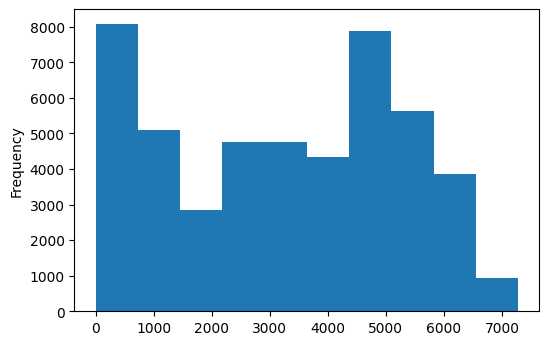

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print(west_traffic['traffic_volume'].describe())

west_traffic['traffic_volume'].plot.hist()
plt.show()

The mean of cars is ~3260 cars per hour with a maxiumum of 7280 cars recorded in one hour and the minimum being zero cars in an hour.

Looking at the histogram of traffic_volume we can see that the most frequent number of car intervals per hour is 0 - 1000 cars. This makes sense as during the nighttime/early morning hours would contain less cars while during the daytime there would be a higher number of cars per hour.

## Traffic Volume: Day vs. Night

Let's make a plot comparing:

* daytime (7am - 7pm)
* nighttime (7pm - 7am) traffic

We'll further explore the realtionship of time to traffic with this definition of night and day times.


In [5]:
west_traffic['date_time'] = pd.to_datetime(west_traffic['date_time'])

day_traffic = west_traffic.copy()[(west_traffic['date_time'].dt.hour >= 7) 
                                  & (west_traffic['date_time'].dt.hour < 19)]
print(day_traffic.shape)

night_traffic = west_traffic.copy()[(west_traffic['date_time'].dt.hour >= 19) 
                                | (west_traffic['date_time'].dt.hour < 7)]
print(night_traffic.shape)

(23877, 9)
(24327, 9)


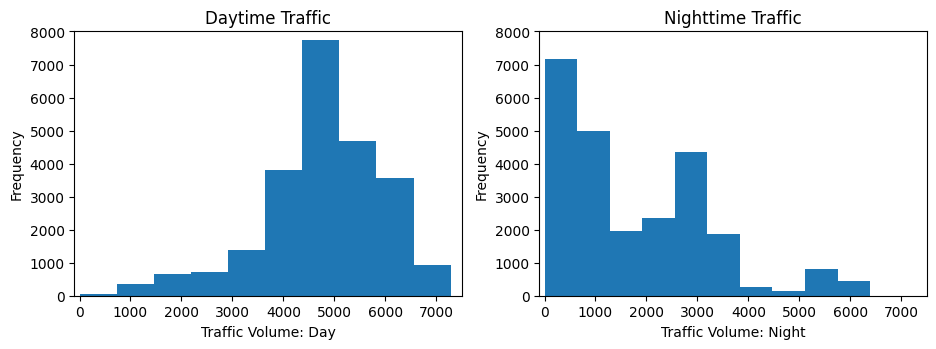

In [6]:
plt.figure(figsize=(11, 3.5))
plt.subplot(1,2,1)
plt.hist(day_traffic['traffic_volume'])
plt.title('Daytime Traffic')
plt.xlim((-100, 7500))
plt.ylim((0, 8000))
plt.xlabel('Traffic Volume: Day')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night_traffic['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlim((-100, 7500))
plt.ylim((0, 8000))
plt.xlabel('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.show()

In [7]:
day_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
night_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime histogram is left skewed with more then 4252 cars on the road about 75% of the time. This is in contrast to nightime traffic which is right skewed and less then 2819 cars 75% of the time. 

This all follows our initial predictions at the beginning where there would be less cars during the night and more cars during the day.

Since the point of our analysis is to analyze what some are some of the causes that may be coorelated to traffic we will ignore the nighttime data in our further analysis.

## Time Indicators

One possible indicator of traffic is time. There might be more people on the road during a certain date, time, or time of day.

Let's take a look at 3 different time indicators:

* Month
* Day of Week
* Time of day

and see how each time period influences traffic volume.

#### Month

In [9]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume'] # 1 is January, 2 Feburary, etc.

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

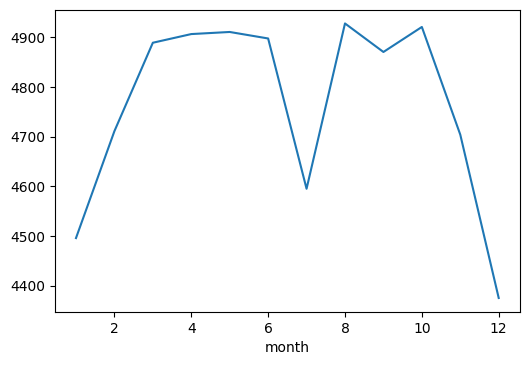

In [10]:
by_month['traffic_volume'].plot.line()
plt.show()

It seems that the colder months see less cars on the road compared to the hotter months. However there is an exception with July; there seems to be a significant dip in the number of cars on average. Lets further explore July and see if anything comes up.

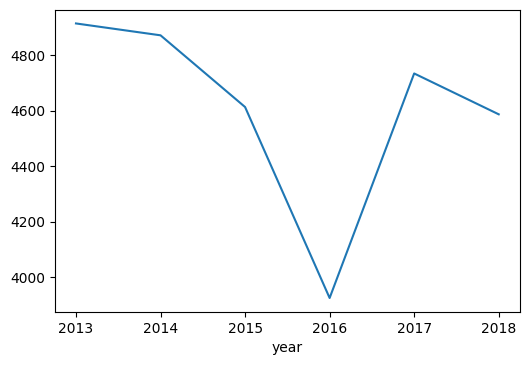

In [11]:
day_traffic['year'] = day_traffic['date_time'].dt.year
only_july = day_traffic[day_traffic['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

It seems that every year besides for 2016 July usually has a higher frequency of cars comparable to the other hotter months of the year. This sudden dip may be attributed to a lot of construction that was happening in [2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) and is otherwise an anomaly amongst the other Julys in this dataset.


#### Day of the Week

Now let's look at the day and see if that influences anything.

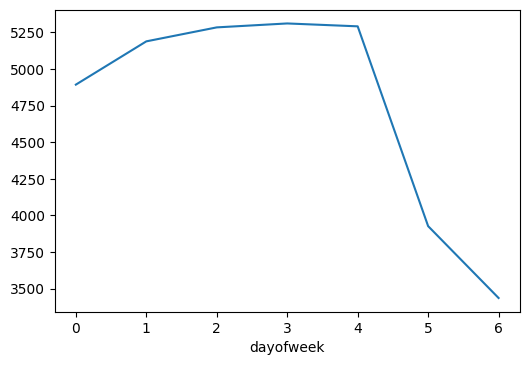

In [12]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

by_dayofweek['traffic_volume'].plot.line()
plt.show()

Weekdays have a higher amount of cars on the road compared to the weekend which makes sense as well; a lot of jobs have weekends as their two days off in the week leading to less traffic during Saturday and Sunday.

#### Time

Let's now see how time of day affects volume. Since the workdays for most people are Monday through Friday we will look at the averages of weekdays and weekends separately.

In [13]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour

weekdays = day_traffic.copy()[day_traffic['dayofweek'] <= 4]  # 4 is Friday
weekends = day_traffic.copy()[day_traffic['dayofweek'] > 4]   # 5 if Saturday

by_hour_weekday = weekdays.groupby('hour').mean()
by_hour_weekend = weekends.groupby('hour').mean()

print(by_hour_weekday['traffic_volume'])
print('\n')
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


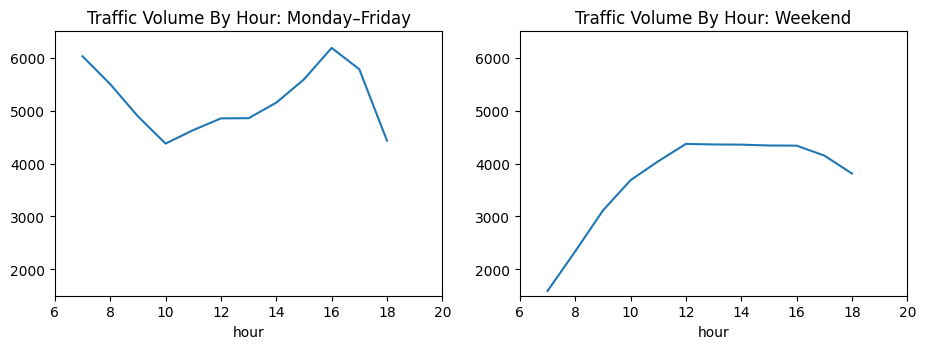

In [14]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_weekday['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

Comparing the weekday vs. weekend traffic volume by hour we can see that the heaviest times for traffic on weekdays is 7am and 4pm while for weekends its 12pm. We will focus on the weekdays where there is more dominate traffic occuring.

## Weather Indicators

Weather is another possible indicator of traffic and the dataset has multiple columns related to rain, temp, snow, etc.

Lets take a look at the correlation values of weather conditions in relation to the `traffic_volume` column.

In [15]:
day_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

There don't seem to be any column with related to weather with a significant correlation to traffic volume, the strongest is the `temp` column with +0.13. 

We'll generate a scatter plot to see visualize `temp` and `traffic_volume`.

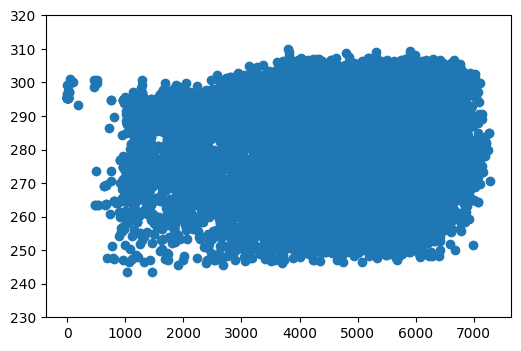

In [20]:
plt.scatter(day_traffic['traffic_volume'], day_traffic['temp'])
plt.ylim(230,320) # two wrong 0K temperatures skew the y-axis
plt.show()

It doesn't seem, from the previous scatter chart, that any of the weather conditions had any signiifcant correlation to heavy traffic.

## Weather Types

Let's check if `weather_main` or `weather_description` have any significance on traffic. 

`weather_main`is a decription of the weather for the day in general (Rain, Mist, Fog, Thunderstorm, etc.) and `weather_description` is a more detailed description of the weather that day (sky is clear, light rain and snow, very heavy rain, etc.)

In [17]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()

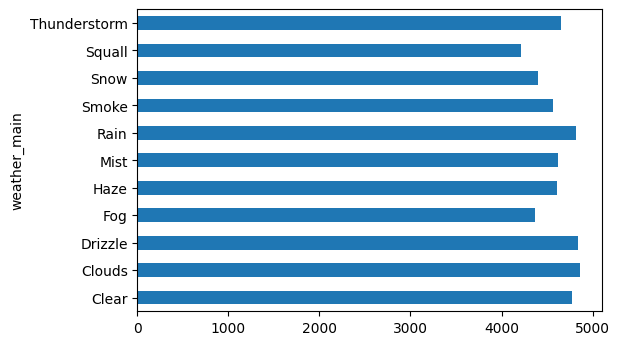

In [21]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There doesn't seem to be anything that causes more than 5000 cars in traffic volume making it difficult to find any indicator on here indicitave of heavy traffic.

Lets move onto the `weather_description` column.

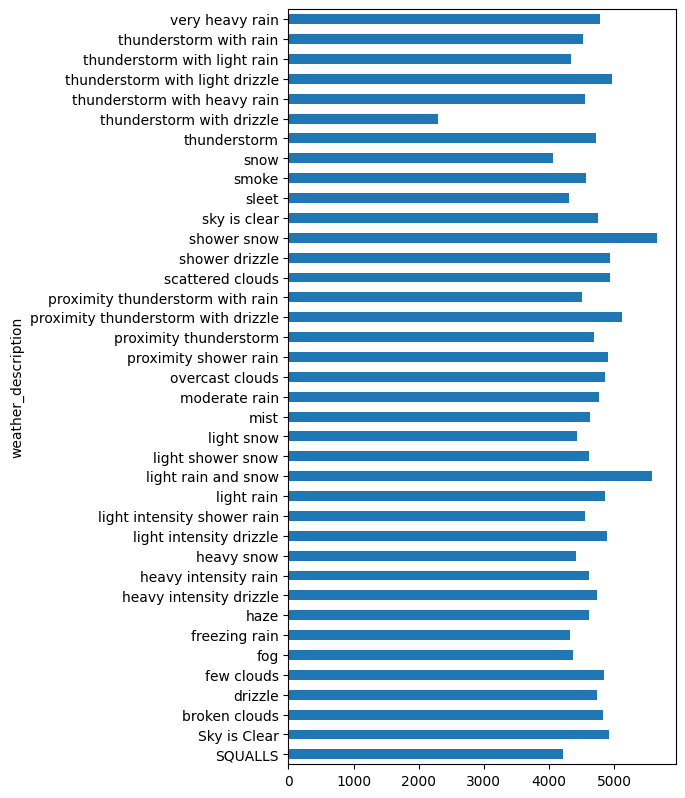

In [22]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these three produced more traffic compared to the other indicators as they aren't as bad of weather as very heavy rain or regular snow. 

A possible explaination could be more people are likely to go to work in lighter conditions rather then call out or call in sick on heavier weather days.

### Final Analysis

In this project we triend to find a few definite indicators of heavy traffic on I-94 Interstate highway. We have come away with two types of indicators:

* Time indicators
    * Traffic during the warmer months (March to October) was heavier compared to the colder months (November to Febuary)
    * Traffic was heavier during the weekdays compared to the weekends
    * Traffic rush hours where 7am (7) and 4pm (16)
* Weather indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle
    

Next steps would be to look for more indicators and research why the lighter weather conditions produced more traffic as opposed to heavier weather conditions on the roads.
    